In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10  #importing cifar10 dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
#Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0   #scaling down xtrain & xtest data divide by 255
x_test = x_test / 255.0     #255.0 gives float value

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
#class labels for CIFAR-10
class_labels = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
#Define the CNN model architecture
#In first conv2d(convolution layer) there will be total 32 filters and size of each filter will be (3,3))
#In second conv2d(convolution layer) there will be total 64 filters and size of each filter will be (3,3))
#First Dense means fully connected network in which neurons will be 128.
#Second Dense means output layer in which total neurons will be 10 as given list in classs_labels
#In output layer if its a multiclassification problem then softmax activation

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2,)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#Compile the model
#Appling sparse_categorical_crossentropy in case of multiclassification
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
#epochs means total iteration
#batch_size means in each iteration there will be 64 batches
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 69s 86ms/step - loss: 1.5190 - accuracy: 0.4551
Epoch 2/5
782/782 [==============================] - 64s 82ms/step - loss: 1.1595 - accuracy: 0.5911
Epoch 3/5
782/782 [==============================] - 66s 85ms/step - loss: 1.0139 - accuracy: 0.6463
Epoch 4/5
782/782 [==============================] - 67s 85ms/step - loss: 0.9221 - accuracy: 0.6805
Epoch 5/5
782/782 [==============================] - 67s 86ms/step - loss: 0.8518 - accuracy: 0.7048


In [ ]:
#Evaluate the model on test data
#Checking how the model preforms on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy : {test_acc}')

313/313 [==============================] - 4s 13ms/step - loss: 0.9490 - accuracy: 0.6671
Test accuracy : 0.6671000123023987


In [ ]:
#Choose a single image from the test set
index = 6  #Replace with the index of the image you want to use
single_image = x_test[index:index+1] #0+1 hoga jo image choose karenge , if 6 the 6+1=7 toh 7th image choose hoga or else sirf index bhi pass kar sakte h

In [ ]:
#Get the predicted PROBABILITIES FOR THE SINGLE IMAGE
predicted_probabilities = model.predict(single_image)

1/1 [==============================] - 0s 30ms/step


In [ ]:
#Get the predicted class (index with highest probability)
predicted_class = np.argmax(predicted_probabilities) #it will take max probability value outoff all probabilities
predicted_label = class_labels[predicted_class]  #predicted_label will store object with highest probability

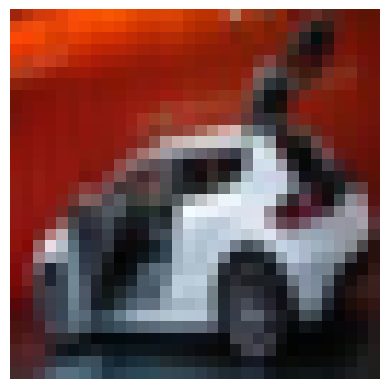

In [ ]:
#Display the input image
plt.imshow(single_image.reshape(32,32,3))
plt.title=(f"Predicted Class: {predicted_label}")
plt.axis('off')
plt.show()

In [ ]:
#Display the predicted probabilities
print('Predicted probabilities:', predicted_probabilities)

Predicted probabilities: [[1.1006843e-03 9.7356105e-01 8.5488995e-05 2.4148086e-04 3.1122024e-06
  3.3381453e-04 1.3539441e-04 3.1361990e-06 3.4891596e-06 2.4532327e-02]]
